In [1]:
import os
import numpy as np

In [2]:
data_path = 'F:/GTSDB/small_img/'

In [3]:
dir_list = os.listdir(data_path)

In [4]:
dic = dict()
index = 0
for _dir in dir_list:
    dic[index] = []
    for root, dirs, files in os.walk(data_path + _dir + '/'):
        dic[index].append(files)
    index += 1

In [5]:
for i in dic:
    print(i, len(dic[i][0]))

0 4
1 79
2 81
3 30
4 68
5 53
6 19
7 41
8 57
9 41
10 80
11 38
12 85
13 83
14 32
15 15
16 8
17 29
18 38
19 2
20 9
21 5
22 13
23 20
24 5
25 31
26 18
27 3
28 14
29 5
30 16
31 2
32 8
33 16
34 12
35 20
36 9
37 2
38 88
39 6
40 10
41 7
42 11


In [6]:
import numpy as np

def isOverlap(img1, img2, tolerance):
    inter_upleft    = np.maximum(img1[:2], img2[:2])
    inter_botright  = np.minimum(img1[2:], img2[2:])

    inter_wh = inter_botright - inter_upleft
    inter_wh = np.maximum(inter_wh, 0)
    inter = inter_wh[0] * inter_wh[1]

    if inter == 0:
        return True, 0

    area_1 = (img1[2] - img1[0]) * (img1[3] - img1[1])
    area_2 = (img2[2] - img2[0]) * (img2[3] - img2[1])

    # iou = inter / (area_1 + area_2 - inter)

    tol_to_1 = inter / area_1
    tol_to_2 = inter / area_2

    if tol_to_1 > tolerance or tol_to_2 > tolerance:
        return False, inter

    return True, 0

['42/00004.ppm', '26/00008.ppm', '03/00003.ppm', '36/00005.ppm', '40/00007.ppm']
(52, 52, 126, 23) (126, 23, 178, 75)
(37, 32, 235, 250) (235, 250, 272, 282)
(36, 38, 73, -18) (73, 0, 109, 20)
(69, 69, 81, 69) (81, 69, 150, 138)
(35, 37, 268, 124) (268, 124, 300, 161)


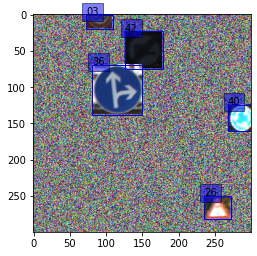

[[(126, 23, 178, 75), '42'], [(235, 250, 272, 282), '26'], [(73, 0, 109, 20), '03'], [(81, 69, 150, 138), '36'], [(268, 124, 300, 161), '40']]


In [39]:
import random

part_number = random.randrange(1, 6)

smallImageList = []

for i in range(part_number):
    select_index = random.randrange(43)
    part_len = len(dic[select_index][0])
    part_select = random.randrange(part_len)
    smallImageList.append(str(select_index if select_index > 9 else '0' + str(select_index)) + '/' + dic[select_index][0][part_select])

print(smallImageList)


import matplotlib.pyplot as plt
from PIL import Image

img = Image.new('RGB', (300, 300))
for x in range(300):
    for y in range(300):
        img.putpixel((x, y), (random.randrange(0, 255),random.randrange(0, 255),random.randrange(0, 255)))

l = []

for smallImage in smallImageList:
    tImg = Image.open(data_path + smallImage)
    resize = random.uniform(1.0, 1.5)
    w, h = (int(tImg.width * resize), int(tImg.height * resize))
    tImg = tImg.resize((w, h))
    x, y = (random.randrange(-20,280), random.randrange(-20,280))
    img.paste(tImg, (x, y))

    leftCol = x if x > 0 else 0
    topRow = y if y > 0 else 0
    rightCol = (x + w) if (x + w) < 300 else 300
    bottomRow = (y + h) if (y + h) < 300 else 300

    position =(leftCol, topRow, rightCol, bottomRow)
    l.append([position, smallImage[:2]])
    print((w, h, x, y), position)

# plt.imshow(img)


plt.imshow(img)

for tar in l:
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((tar[0][0], tar[0][1]), tar[0][2] - tar[0][0], tar[0][3] - tar[0][1], color="blue", fill=False, linewidth=1))
    ax.text(tar[0][0], tar[0][1], tar[1], bbox={'facecolor':'blue', 'alpha':0.5})

plt.show()
print(l)

for a in range(len(l)):
    for b in range(a + 1, len(l)):
        over = isOverlap(l[a][0], l[b][0], 0.1)
        if not over[0]:
            print(l[a], l[b], over)


In [1]:
import matplotlib.pyplot as plt
from create_dataset import create_dataset

t = create_dataset()

[[(131, 258, 208, 300), '27'], [(89, 213, 126, 245), '19'], [(149, 180, 188, 218), '00'], [(183, 94, 230, 136), '22']]


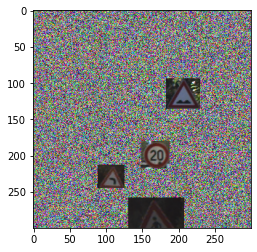

In [2]:
g = t.generate()
plt.imshow(g[0])
print(g[1])

In [4]:
t.create(200)

Done!


True

In [1]:
path = 'F:/NEU-DET/ANNOTATIONS'

import os

a = os.walk(path)

In [3]:
for root, dirs, files in a:
    print(files)

['crazing_1.xml', 'crazing_10.xml', 'crazing_100.xml', 'crazing_101.xml', 'crazing_102.xml', 'crazing_103.xml', 'crazing_104.xml', 'crazing_105.xml', 'crazing_106.xml', 'crazing_107.xml', 'crazing_108.xml', 'crazing_109.xml', 'crazing_11.xml', 'crazing_110.xml', 'crazing_111.xml', 'crazing_112.xml', 'crazing_113.xml', 'crazing_114.xml', 'crazing_115.xml', 'crazing_116.xml', 'crazing_117.xml', 'crazing_118.xml', 'crazing_119.xml', 'crazing_12.xml', 'crazing_120.xml', 'crazing_121.xml', 'crazing_122.xml', 'crazing_123.xml', 'crazing_124.xml', 'crazing_125.xml', 'crazing_126.xml', 'crazing_127.xml', 'crazing_128.xml', 'crazing_129.xml', 'crazing_13.xml', 'crazing_130.xml', 'crazing_131.xml', 'crazing_132.xml', 'crazing_133.xml', 'crazing_134.xml', 'crazing_135.xml', 'crazing_136.xml', 'crazing_137.xml', 'crazing_138.xml', 'crazing_139.xml', 'crazing_14.xml', 'crazing_140.xml', 'crazing_141.xml', 'crazing_142.xml', 'crazing_143.xml', 'crazing_144.xml', 'crazing_145.xml', 'crazing_146.xml',

In [13]:
import os
from ssd_keras.annotations.NEU_annotation import convert_annotation_1
NEU_path = 'F:/NEU-DET/'

ann_file_list = os.walk(NEU_path + 'ANNOTATIONS/')
files = []
for _, _, files in ann_file_list:
    pass

['crazing_1.xml', 'crazing_10.xml', 'crazing_100.xml', 'crazing_101.xml', 'crazing_102.xml', 'crazing_103.xml', 'crazing_104.xml', 'crazing_105.xml', 'crazing_106.xml', 'crazing_107.xml', 'crazing_108.xml', 'crazing_109.xml', 'crazing_11.xml', 'crazing_110.xml', 'crazing_111.xml', 'crazing_112.xml', 'crazing_113.xml', 'crazing_114.xml', 'crazing_115.xml', 'crazing_116.xml', 'crazing_117.xml', 'crazing_118.xml', 'crazing_119.xml', 'crazing_12.xml', 'crazing_120.xml', 'crazing_121.xml', 'crazing_122.xml', 'crazing_123.xml', 'crazing_124.xml', 'crazing_125.xml', 'crazing_126.xml', 'crazing_127.xml', 'crazing_128.xml', 'crazing_129.xml', 'crazing_13.xml', 'crazing_130.xml', 'crazing_131.xml', 'crazing_132.xml', 'crazing_133.xml', 'crazing_134.xml', 'crazing_135.xml', 'crazing_136.xml', 'crazing_137.xml', 'crazing_138.xml', 'crazing_139.xml', 'crazing_14.xml', 'crazing_140.xml', 'crazing_141.xml', 'crazing_142.xml', 'crazing_143.xml', 'crazing_144.xml', 'crazing_145.xml', 'crazing_146.xml',

In [14]:
gt_list = []

for file_name in files:
    gt_list.append(convert_annotation_1(file_name))

print(gt_list)

[('crazing_1.jpg', [((2, 2, 193, 194), 0)]), ('crazing_10.jpg', [((60, 20, 194, 69), 0), ((9, 84, 197, 198), 0)]), ('crazing_100.jpg', [((1, 10, 108, 121), 0), ((35, 1, 200, 83), 0), ((120, 109, 196, 198), 0), ((8, 112, 164, 190), 0)]), ('crazing_101.jpg', [((40, 12, 187, 152), 0)]), ('crazing_102.jpg', [((2, 2, 144, 153), 0), ((150, 85, 199, 178), 0)]), ('crazing_103.jpg', [((1, 18, 130, 99), 0), ((126, 29, 198, 130), 0), ((1, 107, 86, 191), 0)]), ('crazing_104.jpg', [((4, 4, 110, 136), 0), ((142, 10, 197, 56), 0), ((137, 42, 199, 116), 0), ((78, 169, 118, 200), 2)]), ('crazing_105.jpg', [((4, 3, 113, 134), 0), ((133, 1, 197, 149), 0), ((59, 1, 197, 45), 0), ((5, 91, 121, 125), 1)]), ('crazing_106.jpg', [((1, 24, 127, 101), 0), ((16, 120, 189, 156), 0), ((113, 152, 177, 188), 0)]), ('crazing_107.jpg', [((112, 46, 199, 138), 0), ((2, 1, 105, 79), 0), ((11, 146, 127, 199), 0)]), ('crazing_108.jpg', [((3, 21, 69, 149), 0), ((90, 115, 198, 193), 0)]), ('crazing_109.jpg', [((77, 1, 199, 42

In [20]:
import random
random.shuffle(gt_list)

print(gt_list[0][1])

[((51, 1, 70, 82), 5), ((78, 2, 96, 199), 5)]


In [41]:
def img2Gry(img, l1, l2):
    h, w = img.shape[:2]
    gray = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
    for i in range(h):
        for j in range(w):
            if 0 < img[i, j] <= l1:
                gray[i, j] = 0
            elif l1 < img[i, j] <= l2:
                gray[i, j] = 127
            else:
                gray[i, j] = 255
           # gray[i, j] = max(img[i, j][0], img[i, j][1], img[i, j][2])
    return gray

(200, 200, 3)


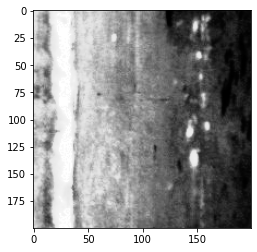

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('F:\\NEU-DET\\IMAGES\\scratches_121.jpg')
# img = cv2.imread('F:\\NEU-DET\\IMAGES\\inclusion_127.jpg')
# img = cv2.imread('F:\\NEU-DET\\IMAGES\\inclusion_236.jpg')
# img = cv2.imread('F:\\NEU-DET\\IMAGES\\patches_270.jpg')
# img = cv2.imread('F:\\NEU-DET\\IMAGES\\pitted_surface_104.jpg')

grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grayImage = cv2.equalizeHist(grayImage)
# grayImage = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
grayImage = cv2.cvtColor(grayImage, cv2.COLOR_GRAY2RGB)
plt.imshow(grayImage)

print(grayImage.shape)

In [40]:
grayImage.shape

(200, 200)

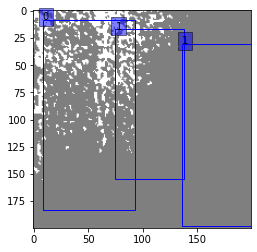

In [106]:
# ret, thresh1 = cv2.threshold(grayImage, 70, 255, cv2.THRESH_BINARY)

thresh1 = img2Gry(grayImage, 70, 170)
# tar = [[1, 121, 123, 198, 0], [1, 33, 112, 116, 1]]
tar = [[8, 8, 93, 183, 0], [75, 17, 138, 155, 1], [136, 30, 200, 198, 1]]
# tar = [[14, 12, 72, 92, 0]]
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
for t in tar:
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((t[0], t[1]), t[2] - t[0], t[3] - t[1], color="blue", fill=False, linewidth=1))
    ax.text(t[0], t[1], t[4], bbox={'facecolor':'blue', 'alpha':0.5})
plt.show()

